# Load data into MNE Raw type
To load the data in as an MNE Raw object, we use the function `eegnb.analysis.utils.load_data()`

In [1]:
from collections import OrderedDict

from mne import Epochs, find_events

from eegnb.analysis.utils import load_data, plot_conditions

subject_id = 'jadin'
session_number = 'all'
board_name = 'muse'
experiment = 'visual_p300'

raw = load_data(subject_id, session_number, board_name, experiment)

['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=30564
    Range : 0 ... 30563 =      0.000 ...   119.387 secs
Ready.


# Visualize ERP

Effective window size : 8.000 (s)


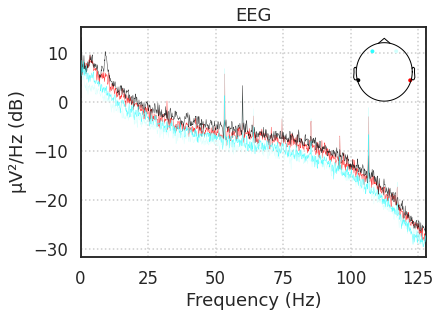

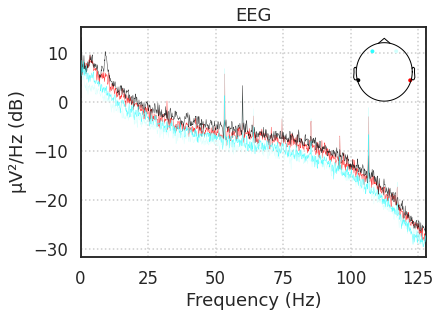

In [2]:
raw.plot_psd()

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 30564

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


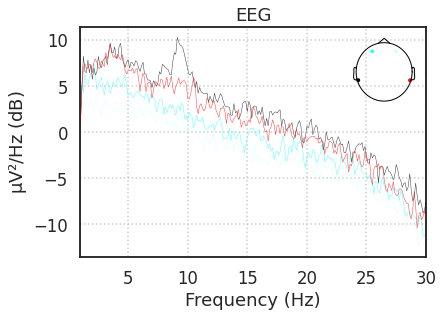

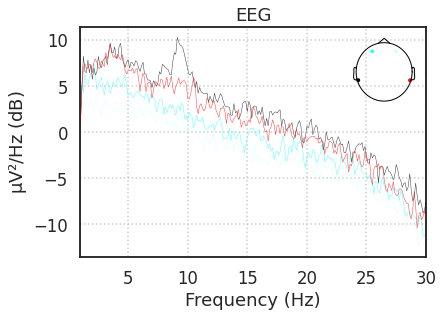

In [3]:
raw.filter(1,30,method='iir')
raw.plot_psd(fmin=1, fmax=30)

In [4]:
events = find_events(raw)
event_id = {'Non-Target': 1, 'Target': 2}

epochs = Epochs(raw, events=events, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 100e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs


439 events found
Event IDs: [1 2]
sample drop %:  2.050113895216399


<Epochs  |   430 events (all good), -0.101562 - 0.800781 sec, baseline off, ~3.1 MB, data loaded,
 'Non-Target': 229
 'Target': 201>

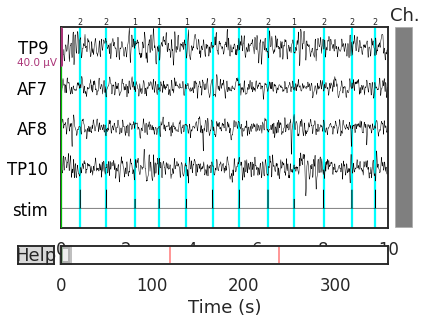

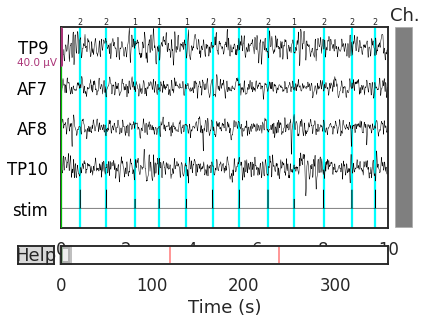

In [6]:

raw.plot(events=events)